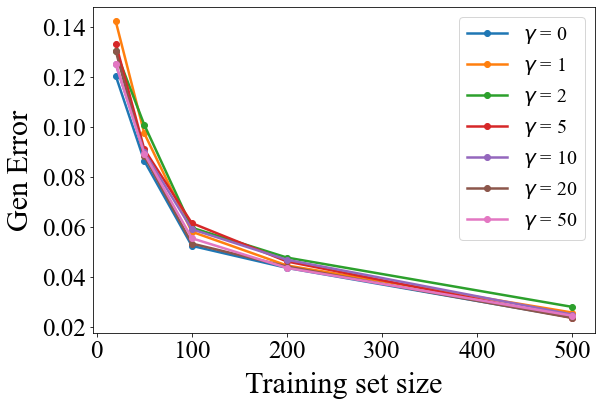

In [4]:
import numpy as np
import matplotlib.pyplot as plt
zo_loss_path_2 = r'.\log\bGMM\m\d1\sigma0.60\nll_loss_2.npy'
zo_loss_2 = np.load(zo_loss_path_2)

fig=plt.figure(figsize=(9,6))
train_size = [20, 50,100,200,500]
gamma_list = [0, 1, 2, 5, 10, 20, 50]

plt.rcParams['font.family']  = ['Times New Roman']
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)


for i, gamma in enumerate(gamma_list):
    zo_loss = zo_loss_2[:len(train_size),i,:]
    avg=np.mean(zo_loss,axis=1)
    plt.plot(train_size, avg,  marker='o',label=r"$\gamma$ = %s" % str(gamma), linewidth=2.5)

plt.ylabel('Gen Error',labelpad=8, fontsize = 30)
plt.xlabel('Training set size',labelpad=8, fontsize = 30)
plt.legend(fontsize = 20)

plt.savefig('./d1.jpg',bbox_inches='tight', dpi=800)
plt.show()

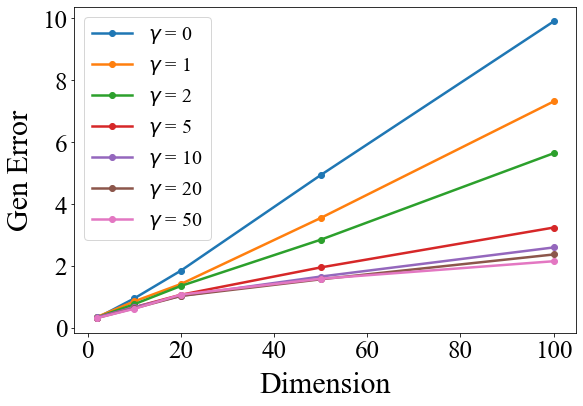

In [3]:
import numpy as np
import matplotlib.pyplot as plt
zo_loss_path_2 = r'.\log\bGMM\d\m10\sigma0.60\nll_loss_2.npy'
zo_loss_2 = np.load(zo_loss_path_2)

fig=plt.figure(figsize=(9,6))
d_list = [2, 10,20,50,100]
gamma_list = [0, 1, 2, 5, 10, 20, 50]

plt.rcParams['font.family']  = ['Times New Roman']
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)


for i, gamma in enumerate(gamma_list):
    zo_loss = zo_loss_2[:len(d_list),i,:]
    avg=np.mean(zo_loss,axis=1)
    plt.plot(d_list, avg,  marker='o',label=r"$\gamma$ = %s" % str(gamma), linewidth=2.5)

plt.ylabel('Gen Error',labelpad=8, fontsize = 30)
plt.xlabel('Dimension',labelpad=8, fontsize = 30)
plt.legend(fontsize = 20)

plt.savefig('./m10.jpg',bbox_inches='tight', dpi=800)
plt.show()

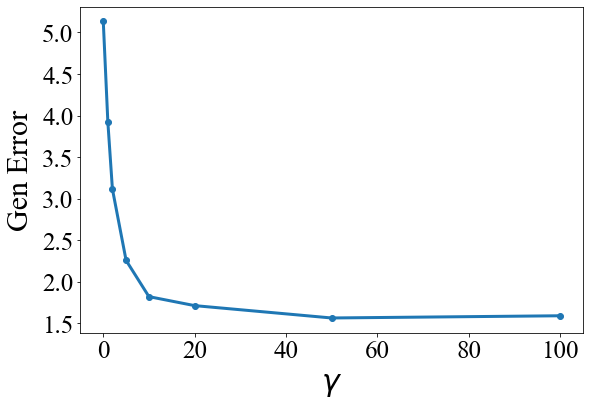

In [26]:
import numpy as np
import matplotlib.pyplot as plt
zo_loss_path_2 = r'.\log\bGMM\gamma\d50_m10\sigma0.60\nll_loss_2.npy'
zo_loss_2 = np.load(zo_loss_path_2)



fig=plt.figure(figsize=(9,6))
gamma_list = [0, 1, 2, 5, 10, 20, 50, 100]
plt.rcParams['font.family']  = ['Times New Roman']
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)

avg_list = []
std_list = []

for j, gamma in enumerate(gamma_list):
    zo_loss = zo_loss_2[j,:]
    # print(zo_loss.shape)
    avg=np.mean(zo_loss)

    avg_list.append(avg)

plt.plot(gamma_list, avg_list,  marker='o', linewidth=3)
plt.ylabel('Gen Error',labelpad=8, fontsize = 30)
plt.xlabel(r"$\gamma$",labelpad=8, fontsize = 30)

plt.savefig('./d50_m10.jpg',bbox_inches='tight', dpi=800)
plt.show()

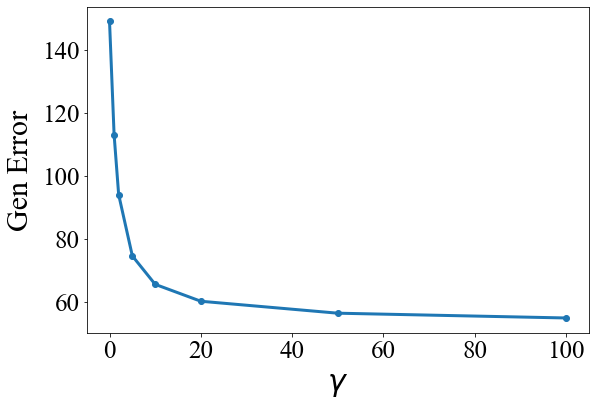

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

m = 10
d = 50


fig=plt.figure(figsize=(9,6))
gamma_list = [0, 1, 2, 5, 10, 20, 50, 100] #d=1/2
# gamma_list = [0, 1, 2, 5, 10, 20, 50, 100] #d=50
plt.rcParams['font.family']  = ['Times New Roman']
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)

pred_list = []

for j, gamma in enumerate(gamma_list):
    m_G = gamma * m
    m_T = m_G + m
    M = d + math.log(m)
    beta = M / m_T

    if d > 2:
        TV = 1
        tau = 1
    else:
        TV = (d/m  * math.log(d)) ** 0.5
        tau = ((gamma * d / m) ** 0.5) * math.log(m*d)

    if gamma > 0:
        
        gen_error = gamma / (1 + gamma) * M * TV
        gen_error += M * (1 + gamma**0.5) / ((1 + gamma) * (m ** 0.5))
        gen_error += ((gamma * m) ** 0.5) * beta / (1 + gamma)
        gen_error += beta * (math.log(m) + math.log(gamma * m)) / (1 + gamma)
        gen_error += math.log(m) * M * tau / (1 + gamma)

    else:    
        gen_error = gamma / (1 + gamma) * M * TV
        gen_error += M * (1 + gamma**0.5) / ((1 + gamma) * (m ** 0.5))
        gen_error += ((gamma * m) ** 0.5) * beta / (1 + gamma)
        gen_error += beta * math.log(m) / (1 + gamma)
        gen_error += math.log(m) * M * tau / (1 + gamma)


    pred_list.append(gen_error)

plt.plot(gamma_list, pred_list,  marker='o', linewidth=3)
# plt.legend(fontsize = 30)
plt.ylabel('Gen Error',labelpad=8, fontsize = 30)
plt.xlabel(r"$\gamma$",labelpad=8, fontsize = 30)

plt.savefig('./d50_m10_pred.jpg',bbox_inches='tight', dpi=800)
plt.show()